In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, auc, roc_auc_score, roc_curve
import seaborn as sn



In [2]:
import sys
sys.path.insert(1,"../")
from scripts import neuralnetwork as nn
nn.load_data_normalized(nn.PATH_TO_FASHION_TRAIN)

X_train, y_train, _ = nn.load_data_normalized(nn.PATH_TO_FASHION_TRAIN)
X_test, y_test, y = nn.load_data_normalized(nn.PATH_TO_FASHION_TEST)


pca = PCA(n_components = 0.90)

X_train_reduced = pca.fit_transform(X_train)

X_test_reduced = pca.transform(X_test)

X_train_reduced.shape

(10000, 62)

In [3]:
# Architecture
classifier = tf.keras.Sequential(name='fasion')
classifier.add(tf.keras.Input(shape=(X_train_reduced.shape[1],)))
classifier.add(tf.keras.layers.Dense(128, activation='relu'))
classifier.add(tf.keras.layers.Dense(5, activation='softmax'))

# Loss, optimizer
classifier.compile(loss='mean_squared_error',
                   optimizer= tf.keras.optimizers.SGD(learning_rate=0.01), 
                   metrics=['accuracy'])

# Show overview of the ANN
classifier.summary()

Model: "fasion"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               8064      
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 8,709
Trainable params: 8,709
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = classifier.fit(X_train_reduced, y_train, epochs=200, batch_size=32)
print('Loss: ', history.history['loss'][-1],'| Acc: ', history.history['accuracy'][-1] )

Epoch 1/200
313/313 [==============================] - 1s 928us/step - loss: 0.1526 - accuracy: 0.3212
Epoch 2/200
313/313 [==============================] - 0s 912us/step - loss: 0.1188 - accuracy: 0.5384
Epoch 3/200
313/313 [==============================] - 0s 938us/step - loss: 0.0997 - accuracy: 0.6543
Epoch 4/200
313/313 [==============================] - 0s 927us/step - loss: 0.0890 - accuracy: 0.7019
Epoch 5/200
313/313 [==============================] - 0s 927us/step - loss: 0.0823 - accuracy: 0.7245
Epoch 6/200
313/313 [==============================] - 0s 943us/step - loss: 0.0778 - accuracy: 0.7392
Epoch 7/200
313/313 [==============================] - 0s 925us/step - loss: 0.0744 - accuracy: 0.7493
Epoch 8/200
313/313 [==============================] - 0s 925us/step - loss: 0.0718 - accuracy: 0.7592
Epoch 9/200
313/313 [==============================] - 0s 950us/step - loss: 0.0697 - accuracy: 0.7666
Epoch 10/200
313/313 [==============================] - 0s 1ms/step - los

In [5]:
def test(xtest,ytest):
    predictions = classifier.predict(xtest)
    acc = np.count_nonzero(np.argmax(predictions,axis=1) == np.argmax(ytest,axis=1)) / xtest.shape[0]
    print("Accuracy:", 100 * acc, "%")
    return np.argmax(predictions, axis=1)

In [6]:
predicted_labels = test(X_test_reduced, y_test)

157/157 [==============================] - 0s 923us/step
Accuracy: 84.32 %


In [7]:
confusion_matrix_ = confusion_matrix(y_true=y, y_pred=predicted_labels)


Text(0.5, 15.049999999999999, 'Predicted labels')

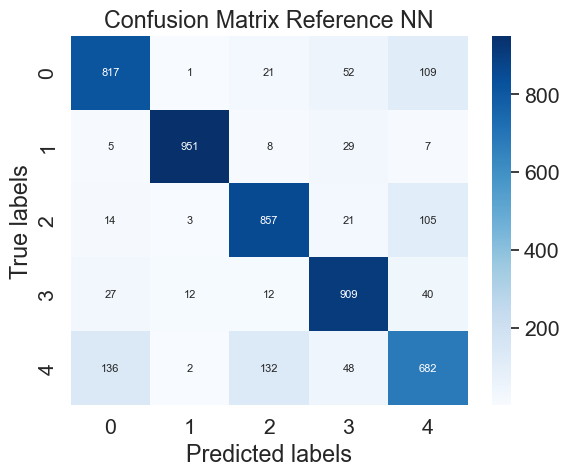

In [8]:
sn.set(font_scale=1.4)
sn.heatmap(confusion_matrix_, cmap="Blues", annot=True, annot_kws={"size":8}, fmt="g" )
plt.title("Confusion Matrix Reference NN")
plt.ylabel("True labels")
plt.xlabel("Predicted labels")

In [9]:
f1 = f1_score(y_true=y, y_pred=predicted_labels, average="macro")
accu = accuracy_score(y_true=y, y_pred=predicted_labels)
precision = precision_score(y_true=y, y_pred=predicted_labels, average="macro")
recall = recall_score(y_true=y, y_pred=predicted_labels, average="macro")

In [10]:
print(f'f1-score: {f1}')
print(f'accuracy-score: {accu}')
print(f'precision-score: {precision}')
print(f'recall-score: {recall}')

f1-score: 0.8425352699475223
accuracy-score: 0.8432
precision-score: 0.8425722991725341
recall-score: 0.8432000000000001
